# SymPy Probability
Initial goal: see if I can derive the Binomial equivalent of [Robbins' formula](https://www.wikiwand.com/en/Empirical_Bayes_method#Robbins'_method:_non-parametric_empirical_Bayes_(NPEB)).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
from sympy.stats import density, E, P, given, where, Poisson, Binomial, Gamma, NegativeBinomial

In [3]:
sp.init_printing(use_latex=True)

In [4]:
q, l = sp.symbols('theta lambda', real=True, nonnegative=True)

In [5]:
n, x = sp.symbols('n x', integer=True, positive=True)
z, u, v = sp.symbols('z u v', real=True)
g = sp.Function('g')

In [6]:
p = Poisson('p', l)
sp.Eq(p, density(p)(x))

In [7]:
b = Binomial('b', n, q)
sp.Eq(b, density(b)(x))

    ⎧ x        n - x ⎛n⎞           
    ⎪θ ⋅(1 - θ)     ⋅⎜ ⎟  for n ≥ x
b = ⎨                ⎝x⎠           
    ⎪                              
    ⎩         0           otherwise

# Poisson
Try replicating working from Chapter 6 of Computer Age Statistical Inference

In [8]:
f = sp.Lambda(x, sp.Integral(density(p)(x)*g(l), l).simplify())
f(x)

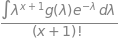

In [9]:
f(x+1)

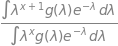

In [10]:
(sp.Integral(l*density(p)(x)*g(l), l)/f(x)).simplify()

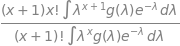

In [11]:
((x+1)*f(x+1)/f(x))

In [12]:
sp.Integral(l**2*density(p)(x)*g(l), l).simplify()

# Binomial 

In [13]:
sp.refine(sp.Integral(density(b)(x)*g(q), q).simplify().simplify(), x<=n)

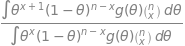

In [14]:
(
    sp.refine(sp.Integral(q*density(b)(x)*g(q), q).simplify().simplify(), x<=n)/
    sp.refine(sp.Integral(density(b)(x)*g(q), q).simplify().simplify(), x<=n)
)

In [15]:
h = sp.Lambda(x, sp.refine(sp.Integral(density(b)(x)*g(q), q).simplify().transform(q, 1/(1+sp.exp(-z))).simplify(), x<=n))
h(x)

In [16]:
sp.refine(sp.Integral(q*density(b)(x)*g(q), q).simplify().transform(q, 1/(1+sp.exp(-z))).simplify(), x<=n)

In [17]:
h(x+1)

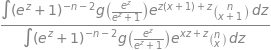

In [18]:
(h(x+1)/h(x))

In [19]:
h(x).transform(sp.exp(z), u)

In [20]:
h(x+1).transform(sp.exp(z), u)

In [21]:
sp.refine(sp.Integral(q*density(b)(x)*g(q), q).simplify().transform(q, 1/(1+sp.exp(-z))).simplify(), x<=n).transform(sp.exp(z), u)

# Poisson with Gamma prior

In [22]:
mu, nu, a, b = sp.symbols('mu nu alpha beta', nonnegative=True)
p_x = Poisson('p_x', mu)  # Likelihood of x given parameter mu
p_mu = Gamma('p_mu', nu, 1)  # Prior on mu

In [23]:
# Marginal distribution of x
f_x = sp.integrate(density(p_x)(x)*density(p_mu)(mu), (mu, 0, sp.oo)).simplify()
f_x

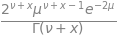

In [24]:
# Conditional distribution of mu given X = x: Bayes rule
p_mu_post = (density(p_x)(x)*density(p_mu)(mu) / f_x).simplify()
p_mu_post

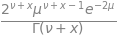

In [25]:
density(Gamma('p_mu', nu + x, sp.S.Half))(mu)

In [33]:
g_generic = density(Gamma('p_mu', a, b))(mu)
g_generic

In [50]:
sp.gamma(1)